In [1]:
data_path = "/../../Social_Network_Ads.csv"

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score



In [4]:
dataF = pd.read_csv(data_path)
dataF.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
#shuffle dataframe
dataF = shuffle(dataF)
dataF

,User ID,Gender,Age,EstimatedSalary,Purchased
288,15649668,Male,41,79000,0
110,15665416,Female,39,71000,0
336,15664907,Male,58,144000,1
286,15631070,Female,37,62000,0
279,15759684,Female,50,36000,1
...,...,...,...,...,...
180,15685576,Male,26,16000,0
318,15742204,Male,45,32000,1
302,15720745,Female,37,137000,1
275,15727467,Male,57,74000,1


In [7]:
# Purchased status prediction with Age and Estimated Salary data
#independent veriable 

data = dataF[['Age','EstimatedSalary']]
data.head()

,Age,EstimatedSalary
288,41,79000
110,39,71000
336,58,144000
286,37,62000
279,50,36000


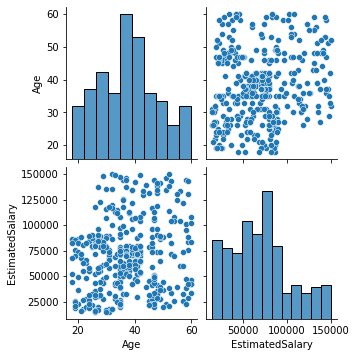

In [8]:
sns.pairplot(data,palette="bright")

In [9]:
#dependent veraible - estimate value

features = dataF[['Purchased']]
features.head()

,Purchased
288,0
110,0
336,1
286,0
279,1


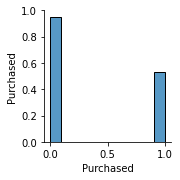

In [10]:
sns.pairplot(features,palette="bright")

In [11]:
# data and label sets
X = data.to_numpy()
y = features['Purchased'].to_numpy()

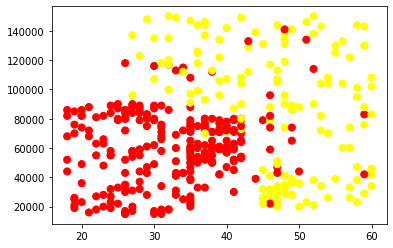

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 1)

In [14]:
#trainset data sample
X_train[0:5]

array([[    18,  52000],
       [    33,  69000],
       [    49,  36000],
       [    34, 115000],
       [    34,  25000]])

In [15]:
#data scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [16]:
#after scaler trainset data sample
X_train[:5]

array([[-1.92422252, -0.52184844],
       [-0.46647819, -0.01073762],
       [ 1.0884491 , -1.00289391],
       [-0.36929523,  1.37226811],
       [-0.36929523, -1.33361267]])

In [17]:
#build svm model and train
svm_model = SVC(kernel='linear',C=1E10 ,random_state = 23)
svm_model.fit(X_train, y_train)

SVC(C=10000000000.0, kernel='linear', random_state=23)

In [18]:
#model predict with testset
y_pred = svm_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[66,  9],
       [11, 34]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


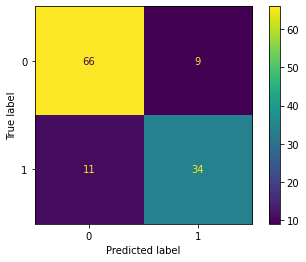

In [19]:
plot_confusion_matrix(svm_model, X_test, y_test)
plt.show()

In [20]:
#model testset score
cross_val_score(estimator = svm_model, X = X_train, y = y_train, cv = 3).mean()

0.8179669030732861

In [26]:
svm_model.coef_[0]

array([4176.40901646, 2745.01841326])

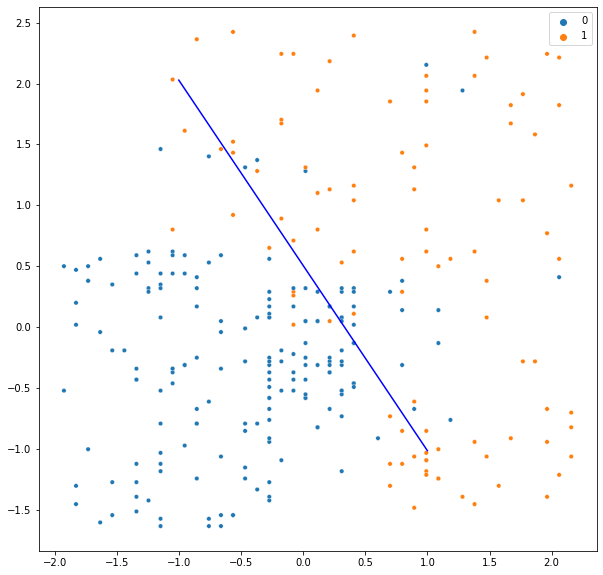

In [29]:
#output visualization

plt.figure(figsize=(10, 10))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train,  s=20)
weight = svm_model.coef_[0]   #weights
b = svm_model.intercept_[0]   #Constants

x_nodes = np.linspace(-1,1)    
y_nodes = -(weight[0] / weight[1]) * x_nodes - b / weight[1] #hyperplane
plt.plot(x_nodes, y_nodes, c='b');